In [1]:
import rioxarray as rxr     # asterio with xarray support
import xarray as xr         # n-dimenzional data
import xvec                 # vector data
import pandas as pd         # data manipulation
import geopandas as gpd     # geospatial data manipulation

import numpy as np          # numerical operations
import seaborn as sns       # statistical data visualization
import matplotlib.pyplot as plt # plotting 


In [2]:
tiff_file_imad = 'data/imad20Itnew_rescale_SWIR.tif' 

rds_imad = rxr.open_rasterio(tiff_file_imad, masked=True).squeeze()
# divide bands into separate variables
landsat9 = rds_imad.sel(band = [1, 2, 3, 4, 5, 6])
landsat5 = rds_imad.sel(band = [7, 8, 9, 10, 11, 12])
iamd = rds_imad.sel(band = [13, 14, 15, 16, 17, 18])
nc_pix = rds_imad.sel(band = [19])
srtm_sl_a = rds_imad.sel(band = [20,21,22])

print(f'Dataset consists of {landsat9.shape[0]} bands of Landsat 9, {landsat5.shape[0]} bands of Landsat 5, {iamd.shape[0]} bands of IAMD, \n{nc_pix.shape[0]} band of NC_Pixels and {srtm_sl_a.shape[0]} bands of SRTM - height, slope, aspect.')


Dataset consists of 6 bands of Landsat 9, 6 bands of Landsat 5, 6 bands of IAMD, 
1 band of NC_Pixels and 3 bands of SRTM - height, slope, aspect.


In [4]:
tiff_file_pif = 'data/PIF_EMD_10_rescale.tif' # PIF_SID.tif

rds_pif = rxr.open_rasterio(tiff_file_pif, masked=True).squeeze()

landsat9 = rds_pif.sel(band = [1, 2, 3, 4, 5, 6])
landsat5 = rds_pif.sel(band = [7, 8, 9, 10, 11, 12])
pif = rds_pif.sel(band = [13, 14, 15, 16, 17, 18])
nc_pix = rds_pif.sel(band = [19])
srtm_sl_a = rds_pif.sel(band = [20, 21, 22])

print(f'Dataset consists of {landsat9.shape[0]} bands of Landsat 9, {landsat5.shape[0]} bands of Landsat 5, {iamd.shape[0]} bands of IAMD, \n{nc_pix.shape[0]} band of NC_Pixels and {srtm_sl_a.shape[0]} bands of SRTM - height, slope, aspect.')

Dataset consists of 6 bands of Landsat 9, 6 bands of Landsat 5, 6 bands of IAMD, 
1 band of NC_Pixels and 3 bands of SRTM - height, slope, aspect.


In [53]:
# load vector data
gdf = gpd.read_file('data/SHP/invar_p.shp')
# check nan values
print(f'count of NaN values for vecotr data: \n{gdf.isna().sum()}')

# reproject gdf to the same crs as raster
gdf_imad = gdf.to_crs(rds_imad.rio.crs)

# SID, SAM, EMD
gdf_pif = gdf.to_crs(rds_pif.rio.crs)

# check if the vector data is in the same crs as raster
print(gdf_imad.crs == rds_imad.rio.crs)
print(gdf_pif.crs == rds_pif.rio.crs)

count of NaN values for vecotr data: 
type        0
geometry    0
dtype: int64
True
True


In [ ]:
# IMAD raster data select bands and create a cube
invar_pix = rds_imad.sel(band=19)
l9_blue = rds_imad.sel(band=1)
l9_green = rds_imad.sel(band=2)
l9_red = rds_imad.sel(band=3)
l9_nir = rds_imad.sel(band=4)
l9_swir1 = rds_imad.sel(band=5)
l9_swir2 = rds_imad.sel(band=6)

l5_blue = rds_imad.sel(band=7)
l5_green = rds_imad.sel(band=8)
l5_red = rds_imad.sel(band=9)
l5_nir = rds_imad.sel(band= 10)
l5_swir1 = rds_imad.sel(band=11)
l5_swir2 = rds_imad.sel(band=12)

iamd_blue = rds_imad.sel(band=13)
iamd_green = rds_imad.sel(band=14)
iamd_red = rds_imad.sel(band=15)
iamd_nir = rds_imad.sel(band=16)
iamd_swir1 = rds_imad.sel(band=17)
iamd_swir2 = rds_imad.sel(band=18)

# create a cube with all imad bands
imad_cube = xr.concat(
    [l9_blue, l9_green, l9_red, l9_nir, l9_swir1, l9_swir2, l5_blue, l5_green, l5_red, l5_nir, l5_swir1, l5_swir2, iamd_blue, iamd_green, iamd_red, iamd_nir, iamd_swir1, iamd_swir2 , invar_pix],
    dim=pd.Index(
        ['l9b', 'l9g', 'l9r', 'l9n', 'l9s1', 'l9s2', 'l5b', 'l5g', 'l5r', 'l5n', 'l5s1', 'l5s2', 'ib',  'ig',  'ir',  'in',  'is1',  'is2', "invar_pix"],
        name='measurement',
    ) #" l9b", "l9g", "l9r", "l9n", "l9s1", "l5b", "l5g", "l5r", "l5n", "l5s1", "ib", "ig", "ir", "in", "is1", "invar_pix"
) #

# PIF raster data select bands and create a cube
distance = rds_pif.sel(band=19)
l9_blue = rds_pif.sel(band=1)
l9_green = rds_pif.sel(band=2)
l9_red = rds_pif.sel(band=3)
l9_nir = rds_pif.sel(band=4)
l9_swir1 = rds_pif.sel(band=5)
l9_swir2 = rds_pif.sel(band=6)

l5_blue = rds_pif.sel(band=7)
l5_green = rds_pif.sel(band=8)
l5_red = rds_pif.sel(band=9)
l5_nir = rds_pif.sel(band= 10)
l5_swir1 = rds_pif.sel(band=11)
l5_swir2 = rds_pif.sel(band=12)

pif_blue = rds_pif.sel(band=13)
pif_green = rds_pif.sel(band=14)
pif_red = rds_pif.sel(band=15)
pif_nir = rds_pif.sel(band=16)
pif_swir1 = rds_pif.sel(band=17)
pif_swir2 = rds_pif.sel(band=18)

# create a cube with all PIF (sid,sam,emd) bands
pif_cube = xr.concat(
    [l9_blue, l9_green, l9_red, l9_nir, l9_swir1, l9_swir2, l5_blue, l5_green, l5_red, l5_nir, l5_swir1, l5_swir2, pif_blue, pif_green, pif_red, pif_nir, pif_swir1, pif_swir2, distance],
    dim=pd.Index(
        ['l9b', 'l9g', 'l9r', 'l9n', 'l9s1', 'l9s2', 'l5b', 'l5g', 'l5r', 'l5n', 'l5s1', 'l5s2', 'pb',  'pg',  'pr',  'pn',  'ps1', 'ps2', 'distance'],
        name='measurement',
    )
)
pif_cube

<xarray.DataArray (measurement: 19, y: 971, x: 1448)> Size: 107MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.009275  , 0.0116125 , 0.0141425 , ..., 0.054485  ,
         0.063505  ,        nan],
        [0.0135375 , 0.01472   , 0.0165625 , ..., 0.056795  ,
         0.06103   ,        nan],
        [       nan,        nan,        nan, ..., 0.0608375 ,
         0.06191   ,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.0213425 , 0.0169239 , 0.03909674, ..., 0.0608703 ,
         0.06526227,        nan],
        [0.02581433, 0.02581433, 0.04354195, ..., 0.0608703 ,
         0.06526227,        nan],
        [       nan,        nan,        nan, ..., 0.06962764,
         0.073993  ,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.        , 1.        , 0.        , ..., 0.        ,
         0.        ,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        ,        nan]]], dtype=float32)
Coordinates:
    band         (measurement) int32 76B 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * x            (x) float64 12kB 4.765e+05 4.765e+05 ... 5.199e+05 5.199e+05
  * y            (y) float64 8kB 5.549e+06 5.549e+06 ... 5.519e+06 5.519e+06
    spatial_ref  int32 4B 0
  * measurement  (measurement) object 152B 'l9b' 'l9g' ... 'ps2' 'distance'
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('l9_B2', 'l9_B3', 'l9_B4', 'l9_B5', 'l9_B6', 'l9_B7', 'l...

In [ ]:
# extract raster values to points: once for imad cube and once for pif cube
vector_imad_cube = imad_cube.drop_vars('spatial_ref').xvec.extract_points(
    points=gdf_imad.geometry,
    x_coords='x',
    y_coords='y',
)
vector_imad_cube

vector_pif_cube = pif_cube.drop_vars('spatial_ref').xvec.extract_points(
    points=gdf_pif.geometry,
    x_coords='x',
    y_coords='y',
)

In [ ]:
#IRMAD: convert extracted raster values to geopandas dataframe
gdf_raster_imad = vector_imad_cube.xvec.to_geopandas()
print(gdf_raster_imad.shape)
gdf_raster_imad.head()
# sjoin
gdf_vec_imad = gdf_raster_imad.sjoin(gdf_imad[['geometry', 'type']], how='left', predicate='intersects')
# dorp index_right column
gdf_vec_imad.drop(columns='index_right', inplace=True)

cols_to_scale = ['l9b', 'l9g', 'l9r', 'l9n', 'l9s1', 'l9s2', 'l5b', 'l5g', 'l5r', 'l5n', 'l5s1', 'l5s2', 'ib',  'ig',  'ir',  'in',  'is1',  'is2']      
gdf_vec_imad[cols_to_scale] *= 100 

# PIF:
gdf_raster_pif = vector_pif_cube.xvec.to_geopandas()
print(gdf_raster_pif.shape)
gdf_raster_pif.head()
# sjoin
gdf_vector = gdf_raster_pif.sjoin(gdf_pif[['geometry', 'type']], how='left', predicate='intersects') 
# dorp index_right column
gdf_vector.drop(columns='index_right', inplace=True)
gdf_vector.dropna()


(25, 20)
(25, 20)


,geometry,l9b,l9g,l9r,l9n,l9s1,l9s2,l5b,l5g,l5r,...,l5s1,l5s2,pb,pg,pr,pn,ps1,ps2,distance,type
0,POINT Z (5.15e+05 5.54e+06 0),0.037958,0.061552,0.072745,0.126178,0.129505,0.103902,0.053578,0.069142,0.085340,...,0.134345,0.115370,0.054632,0.073123,0.087758,0.119270,0.136207,0.113388,0.0,1
1,POINT Z (5.14e+05 5.54e+06 0),0.069115,0.097193,0.112455,0.181590,0.168555,0.138883,0.115865,0.152550,0.167647,...,0.162725,0.146913,0.111820,0.155016,0.166286,0.193134,0.164192,0.143919,0.0,1
2,POINT Z (5.15e+05 5.54e+06 0),0.055282,0.076458,0.102142,0.121200,0.123318,0.093947,0.067575,0.083690,0.104947,...,0.150295,0.124527,0.067483,0.087406,0.106465,0.123683,0.151935,0.122252,0.0,1
3,POINT Z (5.14e+05 5.54e+06 0),0.024098,0.062542,0.066090,0.254162,0.210080,0.137782,0.085148,0.123345,0.136407,...,0.213188,0.173890,0.083617,0.126341,0.136481,0.197393,0.213953,0.170031,0.0,1
4,POINT Z (5.05e+05 5.53e+06 0),0.044090,0.079290,0.080060,0.254135,0.225645,0.165695,0.066365,0.098953,0.108990,...,0.210355,0.174193,0.066372,0.102392,0.110322,0.202242,0.211160,0.170324,0.0,1
5,POINT Z (5.03e+05 5.53e+06 0),0.022915,0.042110,0.028608,0.016810,0.004655,0.002950,0.032623,0.059407,0.045658,...,0.007597,0.002400,0.035392,0.063565,0.049897,0.040300,0.011222,0.004041,0.0,2
6,POINT Z (5.05e+05 5.53e+06 0),0.017360,0.048462,0.032293,0.020880,0.005920,0.004160,0.033200,0.059820,0.054017,...,0.007763,0.011557,0.035922,0.063970,0.057874,0.036272,0.011385,0.012905,0.0,2
7,POINT Z (5.16e+05 5.53e+06 0),0.015105,0.033090,0.014335,0.010457,0.005288,0.003830,0.017690,0.022805,0.016562,...,0.004242,-0.006758,0.021682,0.027627,0.022138,0.022007,0.007914,-0.004823,1.0,2
8,POINT Z (5.17e+05 5.53e+06 0),0.014610,0.025720,0.015325,0.013785,0.006690,0.004270,0.016288,0.023603,0.017250,...,0.010732,0.006910,0.020394,0.028410,0.022794,0.026831,0.014314,0.008406,1.0,2
9,POINT Z (5.02e+05 5.54e+06 0),0.020715,0.035152,0.023960,0.015930,0.007020,0.005232,0.037023,0.051020,0.043155,...,0.011255,0.002702,0.039432,0.055329,0.047510,0.032680,0.014829,0.004334,0.0,2


In [ ]:
# EXTRACT invar pix from imad_cube
imad_df = imad_cube.drop_vars('spatial_ref')

# convert xarray.Dataarray to pandas.DataFrame
imad_df = imad_df.to_dataframe(name='measurement').unstack(level='measurement').reset_index()
imad_df = imad_df.dropna()
# drop all 0 values
imad_df_inv = imad_df[imad_df['measurement']['invar_pix'] != 0]

# multiply all l5, l9 and i * 100 - for better visualization
inner_cols = ['l9b', 'l9g', 'l9r', 'l9n', 'l9s1', 'l9s2',
              'l5b', 'l5g', 'l5r', 'l5n', 'l5s1', 'l5s2',
              'ib',  'ig',  'ir',  'in',  'is1',  'is2']

imad_df = imad_df_inv.copy()

idx = pd.IndexSlice
imad_df.loc[:, idx['measurement', inner_cols]] *= 100
# print(imad_df_inv) - if you want to see the difference
imad_df

y         x band                                ...  \
measurement                       l9b l9g l9r l9n l9s1 l9s2 l5b l5g  ...   
4            5548545.0  476625.0    1   2   3   4    5    6   7   8  ...   
8            5548545.0  476745.0    1   2   3   4    5    6   7   8  ...   
9            5548545.0  476775.0    1   2   3   4    5    6   7   8  ...   
11           5548545.0  476835.0    1   2   3   4    5    6   7   8  ...   
20           5548545.0  477105.0    1   2   3   4    5    6   7   8  ...   
...                ...       ...  ...  ..  ..  ..  ...  ...  ..  ..  ...   
1401249      5519535.0  507495.0    1   2   3   4    5    6   7   8  ...   
1402895      5519505.0  513435.0    1   2   3   4    5    6   7   8  ...   
1403299      5519475.0  482115.0    1   2   3   4    5    6   7   8  ...   
1404074      5519475.0  505365.0    1   2   3   4    5    6   7   8  ...   
1404121      5519475.0  506775.0    1   2   3   4    5    6   7   8  ...   

            measurement                                                    \
measurement         l5n       l5s1     l5s2        ib        ig        ir   
4             20.779749   9.075749  3.88100  1.726594  3.045409  2.123583   
8             18.395500   7.469750  2.96250  1.332199  2.660910  1.540651   
9             20.774250  10.035500  4.33750  1.334391  3.053814  1.837057   
11            18.392750   8.110500  3.42175  1.744122  3.055915  1.839033   
20            20.760500   9.394750  3.88100  1.564454  3.072724  1.852865   
...                 ...        ...      ...       ...       ...       ...   
1401249       19.162750   6.457750  2.49225  0.975054  2.391970  1.337118   
1402895       17.262501   8.993250  3.39975  1.196352  2.410880  1.641429   
1403299       16.896749   5.509000  2.48950  0.764710  2.259602  1.228436   
1404074       17.301001   8.050000  2.94600  1.091181  1.957045  1.590052   
1404121       12.100750   3.914000  2.04125  0.747181  1.599859  1.032808   

                                                      
measurement         in       is1       is2 invar_pix  
4            24.093233  9.100745  3.856244       1.0  
8            21.478836  7.656415  3.083568       1.0  
9            24.087202  9.963881  4.240269       1.0  
11           21.475822  8.232663  3.469906       1.0  
20           24.072126  9.387633  3.856244       1.0  
...                ...       ...       ...       ...  
1401249      22.320148  6.746290  2.687976       1.0  
1402895      20.236469  9.026550  3.451399       1.0  
1403299      19.835415  5.893047  2.685662       1.0  
1404074      20.278687  8.178254  3.069687       1.0  
1404121      14.576468  4.458611  2.308578       1.0  

[2733 rows x 40 columns]

In [ ]:
# EXTRACT invar pix from  pif_cube
pif_df = pif_cube.drop_vars('spatial_ref')

# convert xarray.Dataarray to pandas.DataFrame
pif_df = pif_df.to_dataframe(name='measurement').unstack(level='measurement').reset_index()
pif_df.dropna(inplace=True)
# drop all 0 values - just PIF pixels
pif_df_inv = pif_df[pif_df['measurement']['distance'] != 0]

# multiply all l5, l9 and i * 100
inner_cols = ['l9b', 'l9g', 'l9r', 'l9n', 'l9s1', 'l9s2',
              'l5b', 'l5g', 'l5r', 'l5n', 'l5s1', 'l5s2',
              'pb',  'pg',  'pr',  'pn',  'ps1', 'ps2']

pif_df = pif_df_inv.copy()

idx = pd.IndexSlice
pif_df.loc[:, idx['measurement', inner_cols]] *= 100
pif_df


y         x band                                ...  \
measurement                       l9b l9g l9r l9n l9s1 l9s2 l5b l5g  ...   
4            5548545.0  476625.0    1   2   3   4    5    6   7   8  ...   
22           5548545.0  477165.0    1   2   3   4    5    6   7   8  ...   
41           5548545.0  477735.0    1   2   3   4    5    6   7   8  ...   
55           5548545.0  478155.0    1   2   3   4    5    6   7   8  ...   
56           5548545.0  478185.0    1   2   3   4    5    6   7   8  ...   
...                ...       ...  ...  ..  ..  ..  ...  ...  ..  ..  ...   
1404520      5519475.0  518745.0    1   2   3   4    5    6   7   8  ...   
1405964      5519445.0  518625.0    1   2   3   4    5    6   7   8  ...   
1405967      5519445.0  518715.0    1   2   3   4    5    6   7   8  ...   
1405968      5519445.0  518745.0    1   2   3   4    5    6   7   8  ...   
1406000      5519445.0  519705.0    1   2   3   4    5    6   7   8  ...   

            measurement                                                        \
measurement         l5n       l5s1       l5s2        pb         pg         pr   
4             20.779749   9.075749   3.881000  2.693388   4.142406   3.273823   
22            20.760500   8.751250   3.421750  2.281836   3.680694   2.528683   
41            17.416500   7.786000   2.052250  2.559571   3.713095   2.169232   
55            19.784250   8.426750   3.424500  2.577245   3.726595   2.568039   
56            18.835501   7.786000   2.508750  2.579770   3.726595   2.568039   
...                 ...        ...        ...       ...        ...        ...   
1404520       22.814751  26.337502  21.423250  7.301260  12.150805  14.385321   
1405964       21.876999  24.439999  20.067499  7.972873  12.156205  14.757890   
1405967       22.350000  26.653749  21.874250  7.081597  12.636818  14.385321   
1405968       22.817499  26.972750  22.778999  7.298736  12.634118  14.757890   
1406000       30.355251  15.329250   6.565000  2.923151   4.763421   4.129159   

                                                       
measurement         pn        ps1        ps2 distance  
4            19.572536   9.322577   3.928306      1.0  
22           19.554577   9.002591   3.483785      1.0  
41           16.434784   8.050765   2.158206      1.0  
55           18.643784   8.682604   3.486447      1.0  
56           17.758644   8.050765   2.600065      1.0  
...                ...        ...        ...      ...  
1404520      21.471096  26.344257  20.907959      1.0  
1405964      20.596220  24.473148  19.595688      1.0  
1405967      21.037506  26.656109  21.344494      1.0  
1405968      21.473661  26.970673  22.220228      1.0  
1406000      28.506023  15.489107   6.526227      1.0  

[102402 rows x 40 columns]

In [ ]:
# load csv file with coefficients
coefficients_df_imad = pd.read_csv('data/coeffs/IMAD_coeffs_20_rescale_SWIR_POSLEDNI.csv', index_col=0) # l5l9: IMAD_coeffs_1_rescale_SWIR_POSLEDNI.csv

coefficients_df_pif = pd.read_csv('data/coeffs/PIF_coeffs_EMD_10.csv', index_col=0) # PIF_coeffs_SID, PIF_coeffs_SAM, PIF_coeffs_EMD

cols_to_scale = ['Offset']      
coeff_scaled = coefficients_df_imad.copy()
coeff_scaled[cols_to_scale] *= 100 
coefficients_df_imad
coeff_scaled

,Slope,Offset,Correlation
Band,,,
SR_B2,1.255089,0.173971,0.850291
SR_B3,1.308844,-0.300217,0.931368
SR_B4,1.391671,-0.188079,0.935236
SR_B5,0.911969,-1.192543,0.983946
SR_B6,1.111934,-1.043682,0.985306
SR_B7,1.188725,-0.703013,0.964840


In [ ]:
cols_to_scale_pif = ['offset_before', 'offset_after']      
coeff_scaled_pif = coefficients_df_pif.copy()
coeff_scaled_pif[cols_to_scale_pif] *= 100 
coeff_scaled_pif

,offset_before,scale_before,offset_after,scale_after
band,,,,
SR_B2,2.349439,0.564409,0.543357,0.918241
SR_B3,2.737293,0.677309,0.525910,0.981205
SR_B4,3.771456,0.597128,0.632734,0.953405
SR_B5,15.882891,0.254890,0.192179,0.932925
SR_B6,5.228086,0.732987,0.375279,0.986364
SR_B7,4.956461,0.647954,0.178744,0.967055


### SCATTER PLOTS

In [ ]:
from sklearn.metrics import r2_score


def plot_irmad(
    df, band_l5, band_l9, band_irmad,
    a2, b2,
    band_label='Blue',
    x_min=0, x_max=1, ax_step=0.01
):
    '''
    Plots a scatterplot with regression line and R² for PIF only with adjustable x-range.
    parameters:
    -----------
    df: DataFrame with MultiIndex columns (e.g. imad_df, or pif_df_inv)
    band_l5: Landsat 5 column name (e.g. "l5b")
    band_l9: Landsat 9 column name (e.g. "l9b")
    band_irmad or band_pif (for the second function): normalized column name (e.g. "ib" or "pb")
    a2, b2: PIF vs L9 regression line coefficients
    band_label: band name (e.g. "Blue")
    x_min, x_max: for setting x-axis range
    ax_step: step for x and y ticks
    
    explanation:
    -----------
    - Black dots: scatter L5 x L9 (before normalization)
    - Red dots: scatter IRMAD x L9
    - Orange line: regression line for invariant pixels
    - Gray line: ideal y = x

    the second function plot_pif works in a similar way
    '''

    # data
    x1 = df['measurement'][band_l5].values
    y1 = df['measurement'][band_l9].values
    x2 = df['measurement'][band_irmad].values
    y2 = y1
    
    # masking NaN values
    mask1 = np.isfinite(x1) & np.isfinite(y1)
    mask2 = np.isfinite(x2) & np.isfinite(y2)
    x1, y1 = x1[mask1], y1[mask1]
    x2, y2 = x2[mask2], y2[mask2]

    # fit linear regression
    a1, b1 = np.polyfit(x1, y1, 1)

    # count new coefficients line based on the coefficients counted from IMAD
    # coefficients will be used for check if IMAD data lies on or around the line 
    a_new = a2 * a1
    b_new = a2 * b1 + b2

    # counting R²
    y2_pred =x2
    r2 = r2_score(y2, y2_pred)

    xs = np.linspace(x_min, x_max, 200) # prepare x values for the regression line
    y_comp = a_new * xs + b_new

    plt.figure(figsize=(10,6))
    plt.scatter(x1, y1, s=0.5, c='black', alpha=0.7, label='L5 x L9')    # points L5 vs L9
    plt.scatter(x2, y2, s=0.5, c='red',   alpha=0.5, label='IRMAD x L9') # points IRMAD vs L9

    plt.plot(xs, y_comp, color='orange', label=f'regression line for invariant pixels (IRMAD)') 
    plt.plot(xs, xs, color='gray', linestyle='--', label='ideal: y=x') # idal diagonal

    plt.xlabel(f'Landsat 5 / IRMAD {band_label} band')
    plt.ylabel(f'Landsat 9 {band_label} band')
    plt.suptitle(f'Scatter plot of {band_label}-band surface reflectance [%] for invariant pixels (IRMAD - 15 it.)', fontsize=14)
    plt.title(f'y={a2:.3f}x{b2:.3f}, R²={r2:.3f}\n', fontsize=12) # print scale, offset and R²
    plt.xlim(x_min, x_max)
    plt.xticks(np.arange(x_min, x_max+1, ax_step))
    plt.ylim(x_min, x_max)
    plt.yticks(np.arange(x_min, x_max+1, ax_step))
    plt.legend(fontsize=10, loc='lower right')
    plt.grid(True)
    plt.figure(figsize=(10, 6))
    plt.tight_layout()
    plt.show()

def plot_pif(
    df, band_l5, band_l9, band_pif,
    a2, b2,
    band_label='Blue',
    x_min=7200, x_max=15500, ax_step=1000
):
    # Data
    x_l5 = df['measurement'][band_l5].values
    x_pif = df['measurement'][band_pif].values
    y_l9 = df['measurement'][band_l9].values

    # control NaN values
    mask2 = np.isfinite(x_pif) & np.isfinite(y_l9)
    x2, y2 = x_pif[mask2], y_l9[mask2]

    y2_pred = x2
    r2_2 = r2_score(y2, y2_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(x_l5, y_l9, s=0.5, c='black', label='L5 x L9')       # points L5 vs L9
    plt.scatter(x2, y2, s=0.5, c='red', alpha=0.5, label='SAM x L9') # points normalized vs L9

    x_vals = np.linspace(x_min, x_max, 100)
    y2_line = a2 * x_vals + b2
    plt.plot(x_vals, y2_line, color='orange', label='regression for invariant pixels (SAM)')  
    plt.plot(x_vals, x_vals, color='grey', linestyle='--', label='ideal: y=x')

    plt.xlabel(f'Landsat 5 / SAM {band_label} band')
    plt.ylabel(f'Landsat 9 {band_label} band')
    plt.suptitle(f'Scatter plot of {band_label}-band surface reflactance [%] for invariant pixels (SAM_10)', fontsize=14) # 
    plt.title(f'y={a2:.3f}x + {b2:.3f}, R²={r2_2:.3f}\n', fontsize=12) # print scale, offset and R²
    plt.xlim(x_min, x_max)
    plt.xticks(np.arange(x_min, x_max+1, ax_step))
    plt.ylim(x_min, x_max)
    plt.yticks(np.arange(x_min, x_max+1, ax_step))
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.figure(figsize=(10, 6))
    plt.tight_layout()
    plt.show()

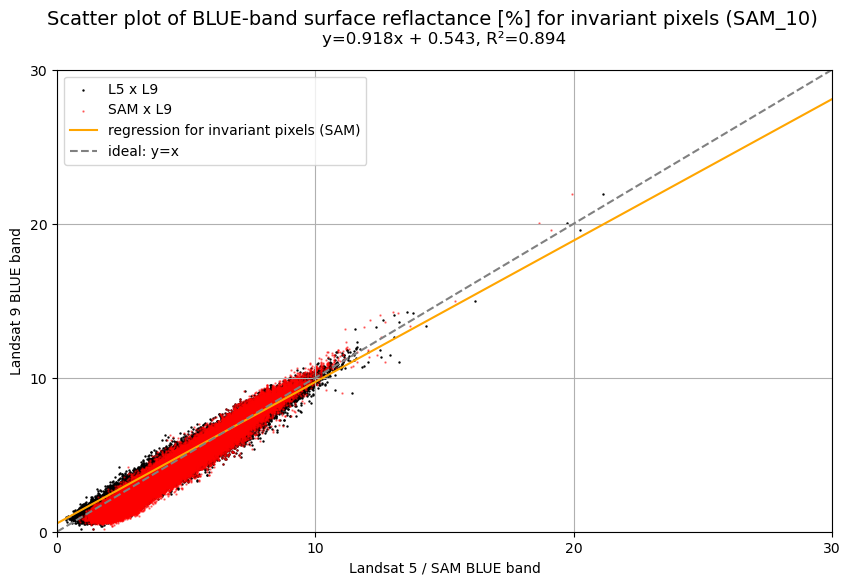

<Figure size 1000x600 with 0 Axes>

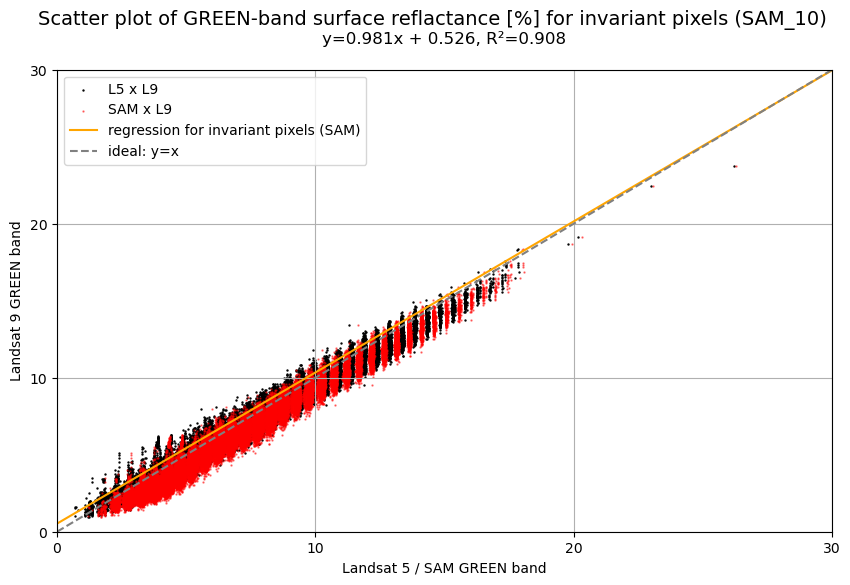

<Figure size 1000x600 with 0 Axes>

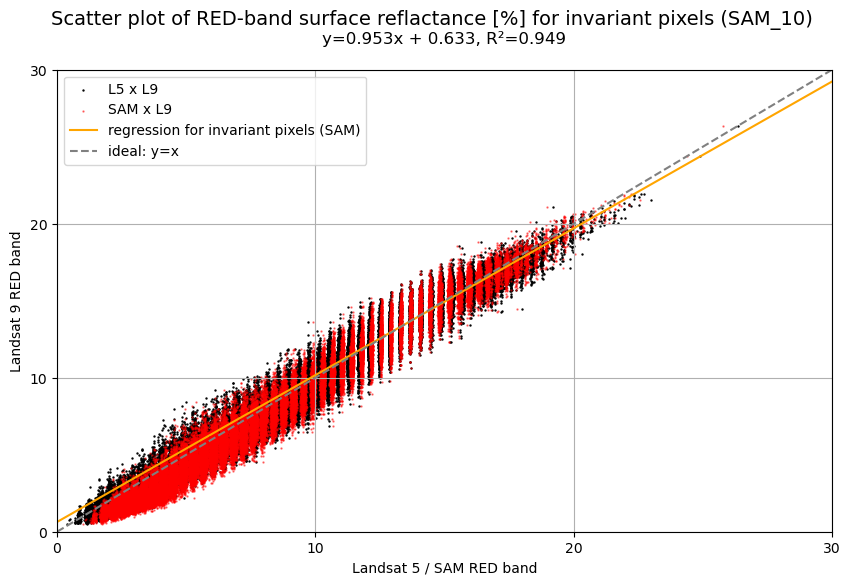

<Figure size 1000x600 with 0 Axes>

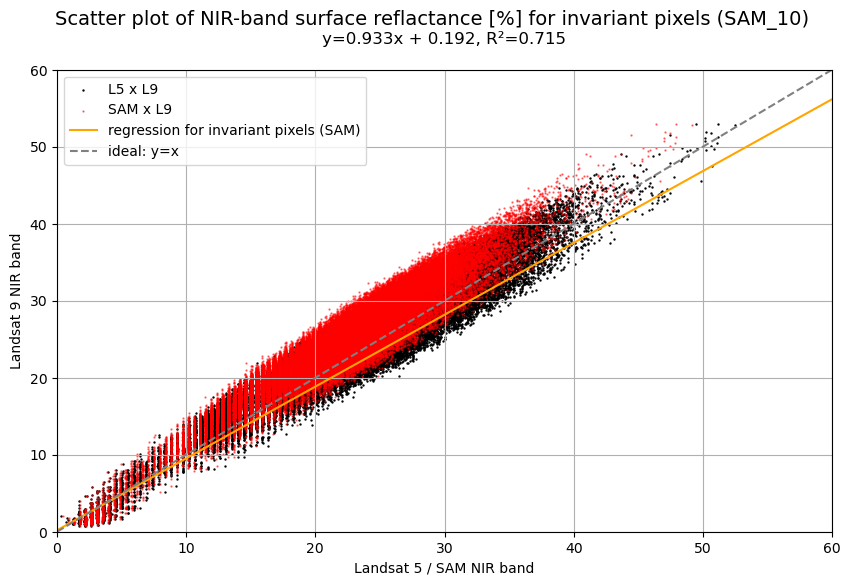

<Figure size 1000x600 with 0 Axes>

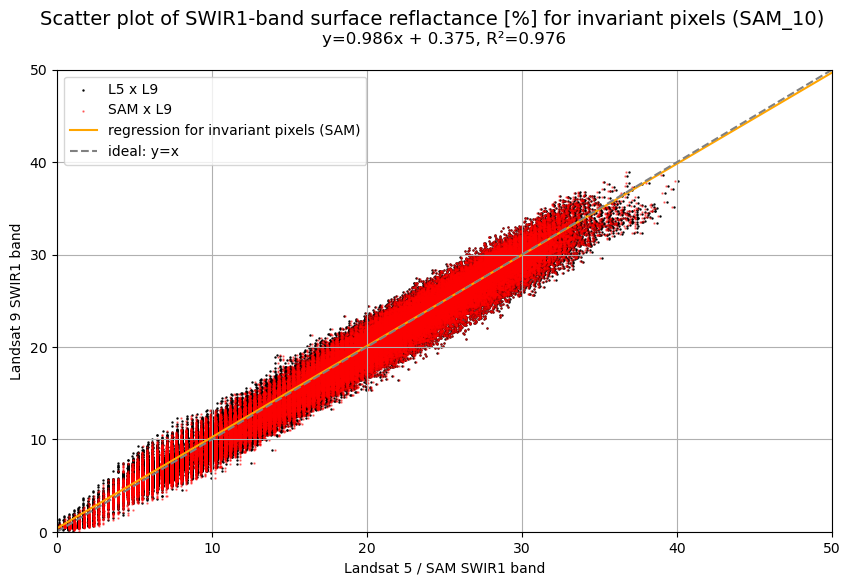

<Figure size 1000x600 with 0 Axes>

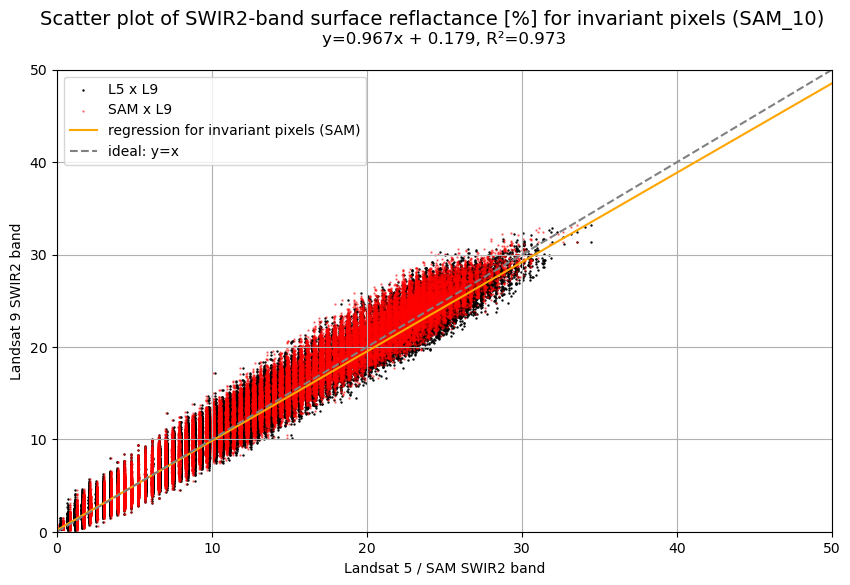

<Figure size 1000x600 with 0 Axes>

In [62]:
# PIF scatter plots
plot_pif(
    df=pif_df,
    band_l5='l5b',
    band_l9='l9b',
    band_pif='pb',
    a2=coeff_scaled_pif.loc['SR_B2', 'scale_after'], # scale after normalization
    b2=coeff_scaled_pif.loc['SR_B2', 'offset_after'], # offset after normalization
    band_label='BLUE',
    x_min=0, x_max=30, ax_step=10
)
plot_pif(
    df=pif_df,
    band_l5='l5g',
    band_l9='l9g',
    band_pif='pg',
    a2=coeff_scaled_pif.loc['SR_B3', 'scale_after'], # scale after normalization
    b2=coeff_scaled_pif.loc['SR_B3', 'offset_after'], # offset after normalization
    band_label='GREEN',
    x_min=0, x_max=30, ax_step=10
)
plot_pif(
    df=pif_df,
    band_l5='l5r',
    band_l9='l9r',
    band_pif='pr',
    a2=coeff_scaled_pif.loc['SR_B4', 'scale_after'], # scale after normalization
    b2=coeff_scaled_pif.loc['SR_B4', 'offset_after'], # offset after normalization
    band_label='RED',
    x_min=0, x_max=30, ax_step=10
)
plot_pif(
    df=pif_df,
    band_l5='l5n',
    band_l9='l9n',
    band_pif='pn',
    a2=coeff_scaled_pif.loc['SR_B5', 'scale_after'], # scale after normalization
    b2=coeff_scaled_pif.loc['SR_B5', 'offset_after'], # offset after normalization
    band_label='NIR',
    x_min=0, x_max=60, ax_step=10
)
plot_pif(
    df=pif_df,
    band_l5='l5s1',
    band_l9='l9s1',
    band_pif='ps1',
    a2=coeff_scaled_pif.loc['SR_B6', 'scale_after'], # scale after normalization
    b2=coeff_scaled_pif.loc['SR_B6', 'offset_after'], # offset after normalization
    band_label='SWIR1',
    x_min=0, x_max=50, ax_step=10
)
plot_pif(
    df=pif_df,
    band_l5='l5s2',
    band_l9='l9s2',
    band_pif='ps2',
    a2=coeff_scaled_pif.loc['SR_B7', 'scale_after'], # scale after normalization
    b2=coeff_scaled_pif.loc['SR_B7', 'offset_after'], # offset after normalization
    band_label='SWIR2',
    x_min=0, x_max=50, ax_step=10
)

In [49]:
plot_irmad(
    df = imad_df, 
    band_l5 = "l5b", 
    band_l9 = "l9b", 
    band_irmad = "ib",
    a2 = coeff_scaled.loc["SR_B2"]["Slope"], 
    b2 = coeff_scaled.loc["SR_B2"]["Offset"],
    band_label="BLUE",
    x_min=0, x_max=15, ax_step=5
)
plot_irmad(
    df = imad_df, 
    band_l5 = "l5g", 
    band_l9 = "l9g", 
    band_irmad = "ig",
    a2 = coeff_scaled.loc["SR_B3"]["Slope"], 
    b2 = coeff_scaled.loc["SR_B3"]["Offset"],
    band_label="GREEN",
    x_min=0, x_max=20, ax_step=5
)
plot_irmad(
    df = imad_df, 
    band_l5 = "l5r", 
    band_l9 = "l9r", 
    band_irmad = "ir",
    a2 = coeff_scaled.loc["SR_B4"]["Slope"], 
    b2 = coeff_scaled.loc["SR_B4"]["Offset"],
    band_label="RED",
    x_min=0, x_max=25, ax_step=5
)
plot_irmad(
    df = imad_df, 
    band_l5 = "l5n", 
    band_l9 = "l9n", 
    band_irmad = "in",
    a2 = coeff_scaled.loc["SR_B5"]["Slope"], 
    b2 = coeff_scaled.loc["SR_B5"]["Offset"],
    band_label="NIR",
    x_min=0, x_max=70, ax_step=10
)
plot_irmad(
    df = imad_df, 
    band_l5 = "l5s1", 
    band_l9 = "l9s1", 
    band_irmad = "is1",
    a2 = coeff_scaled.loc["SR_B6"]["Slope"], 
    b2 = coeff_scaled.loc["SR_B6"]["Offset"],
    band_label="SWIR1",
    x_min=0, x_max=50, ax_step=10
)
plot_irmad(
    df = imad_df, 
    band_l5 = "l5s2", 
    band_l9 = "l9s2", 
    band_irmad = "is2",
    a2 = coeff_scaled.loc["SR_B7"]["Slope"], 
    b2 = coeff_scaled.loc["SR_B7"]["Offset"],
    band_label="SWIR2",
    x_min=0, x_max=50, ax_step=10
)

KeyError: 'measurement'

### STATISTICAL METRICS

In [30]:
# prepare IMAD no change pixels to compute statistical metrics 
# drop unnecessary columns
imad_df_inv = imad_df_inv.drop(['band'], axis=1)

# Flat columns - remove multidimensional index in columns
imad_df_inv.columns = [col[1] if isinstance(col, tuple) else col for col in imad_df_inv.columns]

imad_df_inv = imad_df_inv[(imad_df_inv != 0).all(1)] # drop all 0 values, .all(1) - all columns, all rows
imad_df_inv.dropna(inplace = True) # drop NaN values

# prepare PIF no change pixels for computing metrics 
# drop unnecessary columns
pif_df_inv = pif_df_inv.drop(['band'], axis=1)

# Flat columns - remove multidimensional index in columns
pif_df_inv.columns = [col[1] if isinstance(col, tuple) else col for col in pif_df_inv.columns]

pif_df_inv = pif_df_inv[(pif_df_inv != 0).all(1)] # drop all 0 values, .all(1) - all columns, all rows
pif_df_inv.dropna(inplace = True) # drop NaN values

#pif_df_inv
imad_df_inv

C:\Users\Anna\AppData\Local\Temp\ipykernel_13196\2643532768.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  imad_df_inv = imad_df_inv.drop(['band'], axis=1)
C:\Users\Anna\AppData\Local\Temp\ipykernel_13196\2643532768.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pif_df_inv = pif_df_inv.drop(['band'], axis=1)


,,,l9b,l9g,l9r,l9n,l9s1,l9s2,l5b,l5g,...,l5n,l5s1,l5s2,ib,ig,ir,in,is1,is2,invar_pix
4,5548545.0,476625.0,0.013125,0.028222,0.018158,0.233372,0.096478,0.038150,0.023410,0.036858,...,0.207797,0.090757,0.038810,0.017266,0.030454,0.021236,0.240932,0.091007,0.038562,1.0
8,5548545.0,476745.0,0.012740,0.026572,0.018817,0.205735,0.085395,0.034960,0.018460,0.031825,...,0.183955,0.074698,0.029625,0.013322,0.026609,0.015407,0.214788,0.076564,0.030836,1.0
9,5548545.0,476775.0,0.013593,0.028937,0.018048,0.271680,0.110008,0.043458,0.018488,0.036968,...,0.207742,0.100355,0.043375,0.013344,0.030538,0.018371,0.240872,0.099639,0.042403,1.0
11,5548545.0,476835.0,0.015573,0.031110,0.021925,0.232108,0.098403,0.040542,0.023630,0.036995,...,0.183928,0.081105,0.034217,0.017441,0.030559,0.018390,0.214758,0.082327,0.034699,1.0
20,5548545.0,477105.0,0.020550,0.033695,0.023960,0.264915,0.113995,0.051103,0.021375,0.037215,...,0.207605,0.093947,0.038810,0.015645,0.030727,0.018529,0.240721,0.093876,0.038562,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401249,5519535.0,507495.0,0.009880,0.021925,0.013015,0.212115,0.063780,0.023603,0.013977,0.028305,...,0.191628,0.064577,0.024922,0.009751,0.023920,0.013371,0.223201,0.067463,0.026880,1.0
1402895,5519505.0,513435.0,0.013125,0.026930,0.018185,0.212968,0.091555,0.037435,0.016755,0.028553,...,0.172625,0.089933,0.033997,0.011964,0.024109,0.016414,0.202365,0.090266,0.034514,1.0
1403299,5519475.0,482115.0,0.009165,0.022282,0.013400,0.208485,0.057840,0.022695,0.011338,0.026572,...,0.168968,0.055090,0.024895,0.007647,0.022596,0.012284,0.198354,0.058930,0.026857,1.0
1404074,5519475.0,505365.0,0.012685,0.021182,0.013098,0.196633,0.077393,0.029708,0.015435,0.022612,...,0.173010,0.080500,0.029460,0.010912,0.019570,0.015901,0.202787,0.081783,0.030697,1.0


In [31]:
# drop unnecessary columns
imad_df = imad_df.drop(['band'], axis=1)

# Flat columns - remove multidimensional index in columns
imad_df.columns = [col[1] if isinstance(col, tuple) else col for col in imad_df.columns]

imad_df = imad_df[(imad_df != 0).all(1)] # drop all 0 values, .all(1) - all columns, all rows
imad_df.dropna(inplace = True) # drop NaN values

imad_df

C:\Users\Anna\AppData\Local\Temp\ipykernel_13196\2810793017.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  imad_df = imad_df.drop(['band'], axis=1)


,,,l9b,l9g,l9r,l9n,l9s1,l9s2,l5b,l5g,...,l5n,l5s1,l5s2,ib,ig,ir,in,is1,is2,invar_pix
4,5548545.0,476625.0,1.31250,2.82225,1.81575,23.337250,9.647750,3.81500,2.34100,3.68575,...,20.779749,9.075749,3.88100,1.726594,3.045409,2.123583,24.093233,9.100745,3.856244,1.0
8,5548545.0,476745.0,1.27400,2.65725,1.88175,20.573500,8.539500,3.49600,1.84600,3.18250,...,18.395500,7.469750,2.96250,1.332199,2.660910,1.540651,21.478836,7.656415,3.083568,1.0
9,5548545.0,476775.0,1.35925,2.89375,1.80475,27.167999,11.000751,4.34575,1.84875,3.69675,...,20.774250,10.035500,4.33750,1.334391,3.053814,1.837057,24.087202,9.963881,4.240269,1.0
11,5548545.0,476835.0,1.55725,3.11100,2.19250,23.210751,9.840250,4.05425,2.36300,3.69950,...,18.392750,8.110500,3.42175,1.744122,3.055915,1.839033,21.475822,8.232663,3.469906,1.0
20,5548545.0,477105.0,2.05500,3.36950,2.39600,26.491499,11.399500,5.11025,2.13750,3.72150,...,20.760500,9.394750,3.88100,1.564454,3.072724,1.852865,24.072126,9.387633,3.856244,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401249,5519535.0,507495.0,0.98800,2.19250,1.30150,21.211500,6.378000,2.36025,1.39775,2.83050,...,19.162750,6.457750,2.49225,0.975054,2.391970,1.337118,22.320148,6.746290,2.687976,1.0
1402895,5519505.0,513435.0,1.31250,2.69300,1.81850,21.296749,9.155500,3.74350,1.67550,2.85525,...,17.262501,8.993250,3.39975,1.196352,2.410880,1.641429,20.236469,9.026550,3.451399,1.0
1403299,5519475.0,482115.0,0.91650,2.22825,1.34000,20.848501,5.784000,2.26950,1.13375,2.65725,...,16.896749,5.509000,2.48950,0.764710,2.259602,1.228436,19.835415,5.893047,2.685662,1.0
1404074,5519475.0,505365.0,1.26850,2.11825,1.30975,19.663250,7.739250,2.97075,1.54350,2.26125,...,17.301001,8.050000,2.94600,1.091181,1.957045,1.590052,20.278687,8.178254,3.069687,1.0


In [32]:
# prepare PIF no change pixels for computing metrics 
# drop unnecessary columns
pif_df = pif_df.drop(['band'], axis=1)

# Flat columns - remove multidimensional index in columns
pif_df.columns = [col[1] if isinstance(col, tuple) else col for col in pif_df.columns]

pif_df = pif_df[(pif_df != 0).all(1)] # drop all 0 values, .all(1) - all columns, all rows
pif_df.dropna(inplace = True) # drop NaN values

pif_df

C:\Users\Anna\AppData\Local\Temp\ipykernel_13196\3282872315.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pif_df = pif_df.drop(['band'], axis=1)


,,,l9b,l9g,l9r,l9n,l9s1,l9s2,l5b,l5g,...,l5n,l5s1,l5s2,pb,pg,pr,pn,ps1,ps2,distance
4,5548545.0,476625.0,1.31250,2.822250,1.815750,23.337250,9.647750,3.815000,2.34100,3.685750,...,20.779749,9.075749,3.881000,2.693388,4.142406,3.273823,19.572536,9.322577,3.928306,1.0
22,5548545.0,477165.0,1.45825,2.605000,1.576500,23.073250,9.661500,3.661000,1.89275,3.215500,...,20.760500,8.751250,3.421750,2.281836,3.680694,2.528683,19.554577,9.002591,3.483785,1.0
41,5548545.0,477735.0,1.31250,2.346500,1.741500,18.362499,8.347000,3.410750,2.19525,3.248500,...,17.416500,7.786000,2.052250,2.559571,3.713095,2.169232,16.434784,8.050765,2.158206,1.0
55,5548545.0,478155.0,1.22175,2.643500,1.807500,21.569000,8.256249,3.287000,2.21450,3.262250,...,19.784250,8.426750,3.424500,2.577245,3.726595,2.568039,18.643784,8.682604,3.486447,1.0
56,5548545.0,478185.0,1.29600,2.772750,1.991750,20.573500,8.300250,3.493250,2.21725,3.262250,...,18.835501,7.786000,2.508750,2.579770,3.726595,2.568039,17.758644,8.050765,2.600065,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404520,5519475.0,518745.0,7.61000,11.905500,14.853499,22.781750,23.972500,19.646749,7.35975,11.842250,...,22.814751,26.337502,21.423250,7.301260,12.150805,14.385321,21.471096,26.344257,20.907959,1.0
1405964,5519445.0,518625.0,8.35800,12.892750,16.192751,21.222500,23.043001,19.668751,8.09125,11.847750,...,21.876999,24.439999,20.067499,7.972873,12.156205,14.757890,20.596220,24.473148,19.595688,1.0
1405967,5519445.0,518715.0,8.14625,12.510499,15.961750,21.907251,24.712250,21.005251,7.12050,12.337251,...,22.350000,26.653749,21.874250,7.081597,12.636818,14.385321,21.037506,26.656109,21.344494,1.0
1405968,5519445.0,518745.0,7.93175,12.472000,15.868250,22.267500,25.350248,21.272001,7.35700,12.334500,...,22.817499,26.972750,22.778999,7.298736,12.634118,14.757890,21.473661,26.970673,22.220228,1.0


In [ ]:
def compute_metrics(y_true, y_pred, method):
    res = y_pred - y_true # residuals = difference between predicted (L5, IRMAD, PIF) and true (L9) values
    return {
        f'rmse_{method}':   np.sqrt(np.mean(res**2)),
        f'mae_{method}':    np.mean(np.abs(res)), # mean absolute value of residuals
        f'stddev_{method}': np.std(res, ddof=1),
        f'mbe_{method}':    np.mean(res) # mean value of residuals
    }

def summarize_all_metrics(df, method='BI'):
    '''
    Calculate the metric for each band:
    Output: DataFrame with MultiIndex (band, method).
    '''
    
    allowed = {'before','PIF','IRMAD','BI',"BP"}
    if method not in allowed:
        raise ValueError(f'Unknown method: {method}')
    
    bands = ['b','g','r','n','s1', 's2'] # bands for Landsat 9 and Landsat 5
    rows = []

    for band in bands:
        y_true = df[f'l9{band}'].to_numpy()

        if method in ('before','BI','BP'):
            # L5 vs L9
            y_pred = df[f'l5{band}'].to_numpy()
            m = compute_metrics(y_true, y_pred, 'before')
            m.update(band=band) #, method='before'
            rows.append(m)

        if method in ('PIF','BP'):
            # PIF vs L9
            y_pred = df[f'p{band}'].to_numpy()
            m = compute_metrics(y_true, y_pred, 'PIF')
            m.update(band=band)#, method='PIF'
            rows.append(m)

        if method in ('IRMAD','BI'):
            # IRMAD vs L9
            y_pred = df[f'i{band}'].to_numpy()
            m = compute_metrics(y_true, y_pred, 'IRMAD')
            m.update(band=band) #, method='IRMAD'
            rows.append(m)

    metrics_df = pd.DataFrame(rows).set_index(['band'])
    return metrics_df

In [ ]:
# compute metrics for IMAD
#imad_metrics = summarize_all_metrics(imad_df_inv, method='IRMAD')
imad_metrics = summarize_all_metrics(imad_df, method='IRMAD')

#pif_metrics = summarize_all_metrics(pif_df, method='PIF')
#pif_metrics

#before_metrics_imad = summarize_all_metrics(imad_df_inv, method='before')
before_metrics_imad = summarize_all_metrics(imad_df, method='before')
before_metrics_imad

In [ ]:
before_metrics_pif = summarize_all_metrics(pif_df, method='before')
print(before_metrics_pif)
# rename columns
before_metrics_pif.rename(columns = {'rmse_before': 'rmse_before_pif', 'mae_before': 'mae_before_pif', 'stddev_before': 'stddev_before_pif', 'mbe_before': 'mbe_before_pif'}, inplace = True)
print(before_metrics_pif)

In [ ]:
# why do the metrics for before come out differently for the PIF dataset and differently for the IMAD dataset?
# because the PIF dataset is different than the IMAD dataset, different data, different locations, different time, different atmosphere, different geometry, etc.

In [ ]:
before_metrics_imad
#before_metrics_pif

In [ ]:
imad_metrics
#pif_metrics

In [ ]:
# cat all metrics together
all_metrics = pd.concat([before_metrics_imad, imad_metrics], axis=1) #, before_metrics_pif, pif_metrics
#all_metrics = pd.concat([before_metrics_pif, pif_metrics], axis=1) #, before_metrics_pif, pif_metrics
all_metrics
# save to excel file
all_metrics.to_excel('norm_metrics_15_posledni.xlsx', index=True, sheet_name='metrics')

### SPECTRAL REFLECTANCE CURVES

In [ ]:
# sort landcover types from 1 to 5
gdf_vec_imad = gdf_vec_imad.sort_values(by='type')
# spectral bands for Landsat 9
l9_spect_bands = ['ib', 'ig', 'ir', 'in', 'is1', 'is2'] # ['l5b', 'l5g', 'l5r', 'l5n', 'l5s1'], nebo ['ib', 'ig', 'ir', 'in', 'is1', 'is2']
land_names = ['1) Builtup', '2) Water', '3) Forest', '4) Cropland', '5) Grassland']

# get unique landcover types
landcover_types = gdf_vec_imad['type'].unique()

# count rows and columns for subplots
n_cols = 3 
n_rows = int(np.ceil(len(landcover_types) / n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

for idx, landcover_type in enumerate(landcover_types):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    
    subset = gdf_vec_imad[gdf_vec_imad['type'] == landcover_type]
    
    # plot each spectral curve separately (one line = one point)
    for _, row_data in subset.iterrows():
        ax.plot(l9_spect_bands, row_data[l9_spect_bands], alpha=0.2, color='gray')
    
    # count the mean and std of the each band
    mean_spect = subset[l9_spect_bands].mean()
    std_spectrum = subset[l9_spect_bands].std()
    ax.plot(l9_spect_bands, mean_spect, color='red', linewidth=2, label='mean')
    ax.plot(l9_spect_bands, mean_spect - 2*std_spectrum, '--', color='darkred', linewidth=2.5, label='± 2 std')
    ax.plot(l9_spect_bands, mean_spect + 2*std_spectrum, '--', color='darkred', linewidth=2.5)
    
    ax.set_title(f'{land_names[idx]}')
    ax.set_xlabel('Band')
    ax.set_ylabel('SR')
    ax.grid(True)
    ax.legend()

# hide empty subplots
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])
plt.suptitle('Landsat 9 Spectral Curves', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

NameError: name 'gdf_vec_imad' is not defined

In [39]:
# IRMAD ONLY
# delete max value for type 1 from l5b
type1 = gdf_vec_imad[gdf_vec_imad['type'] == 1]
del1 = type1[type1['l5b'] ==type1['l5b'].min()]
# delete max value for type 1 from l5b
# type1 = type1.drop(type1[type1['l5b'] == type1['l5b'].max()].index)
gdf_vec_imad = gdf_vec_imad.drop(type1[type1['l5b'] ==type1['l5b'].min()].index)

In [40]:
# PIF ONLY
# delete max value for type 1 from l5b
type1 = gdf_vector[gdf_vector['type'] == 1]
del1 = type1[type1['l5b'] ==type1['l5b'].min()]
# delete max value for type 1 from l5b
# type1 = type1.drop(type1[type1['l5b'] == type1['l5b'].max()].index)
gdf_vec_imad = gdf_vector.drop(type1[type1['l5b'] ==type1['l5b'].min()].index)

In [ ]:
# create graphs with relfectance curves
print(gdf_vec_imad['type'].unique())

def get_mean_values(subset):
    l5 = ['l5b', 'l5g', 'l5r', 'l5n', 'l5s1', 'l5s2'] #'l5s2'
    l9 = ['l9b', 'l9g', 'l9r', 'l9n', 'l9s1', 'l9s2'] # 'l9s2'
    #pif: ['pb', 'pg', 'pr', 'pn', 'ps1', 'ps2'] - if you run PIF ONLY - copy this line and paste it into line below
    imad = ['pb', 'pg', 'pr', 'pn', 'ps1', 'ps2']
    #imad: ['ib', 'ig', 'ir', 'in', 'is1', 'is2'] - if you run IRMAD ONLY - copy this line and paste it into line above
    mean_landsat9 = subset[l9].mean().values
    mean_landsat5 = subset[l5].mean().values
    mean_irmad = subset[imad].mean().values
    return (mean_landsat9, mean_landsat5, mean_irmad)

def get_median_values(subset):
    l5 = ['l5b', 'l5g', 'l5r', 'l5n', 'l5s1', 'l5s2']
    l9 = ['l9b', 'l9g', 'l9r', 'l9n', 'l9s1', 'l9s2']
    #pif: ['pb', 'pg', 'pr', 'pn', 'ps1', 'ps2'] - if you run PIF ONLY - copy this line and paste it into line below
    imad = ['pb', 'pg', 'pr', 'pn', 'ps1', 'ps2']
    #imad: ['ib', 'ig', 'ir', 'in', 'is1', 'is2'] - if you run IRMAD ONLY - copy this line and paste it into line above
    median_landsat9 = subset[l9].median().values
    median_landsat5 = subset[l5].median().values
    median_irmad = subset[imad].median().values
    # merge into one dataframe
    median_df = pd.DataFrame([median_landsat9, median_landsat5, median_irmad], columns=l9)
    return (median_landsat9, median_landsat5, median_irmad)

# create subsets for each landcover type
gdf_vector1 = gdf_vec_imad[gdf_vec_imad['type'] == 1] 
gdf_vector2 = gdf_vec_imad[gdf_vec_imad['type'] == 2]
gdf_vector3 = gdf_vec_imad[gdf_vec_imad['type'] == 3]
gdf_vector4 = gdf_vec_imad[gdf_vec_imad['type'] == 4]
gdf_vector5 = gdf_vec_imad[gdf_vec_imad['type'] == 5]
gdf_vector6 = gdf_vec_imad[gdf_vec_imad['type'] == 6]

l9mean_vector1, l5mean_vector1, imadmean_vector1 = get_mean_values(gdf_vector1)
l9mean_vector2, l5mean_vector2, imadmean_vector2 = get_mean_values(gdf_vector2)
l9mean_vector3, l5mean_vector3, imadmean_vector3 = get_mean_values(gdf_vector3)
l9mean_vector4, l5mean_vector4, imadmean_vector4 = get_mean_values(gdf_vector4)
l9mean_vector5, l5mean_vector5, imadmean_vector5 = get_mean_values(gdf_vector5)
l9mean_vector6, l5mean_vector6, imadmean_vector6 = get_mean_values(gdf_vector6)

l9median_vector1, l5median_vector1, imadmedian_vector1 = get_median_values(gdf_vector1)
l9median_vector2, l5median_vector2, imadmedian_vector2 = get_median_values(gdf_vector2)
l9median_vector3, l5median_vector3, imadmedian_vector3 = get_median_values(gdf_vector3)
l9median_vector4, l5median_vector4, imadmedian_vector4 = get_median_values(gdf_vector4)
l9median_vector5, l5median_vector5, imadmedian_vector5 = get_median_values(gdf_vector5)
l9median_vector6, l5median_vector6, imadmedian_vector6 = get_median_values(gdf_vector6)

[1 2 3 6 4 5]


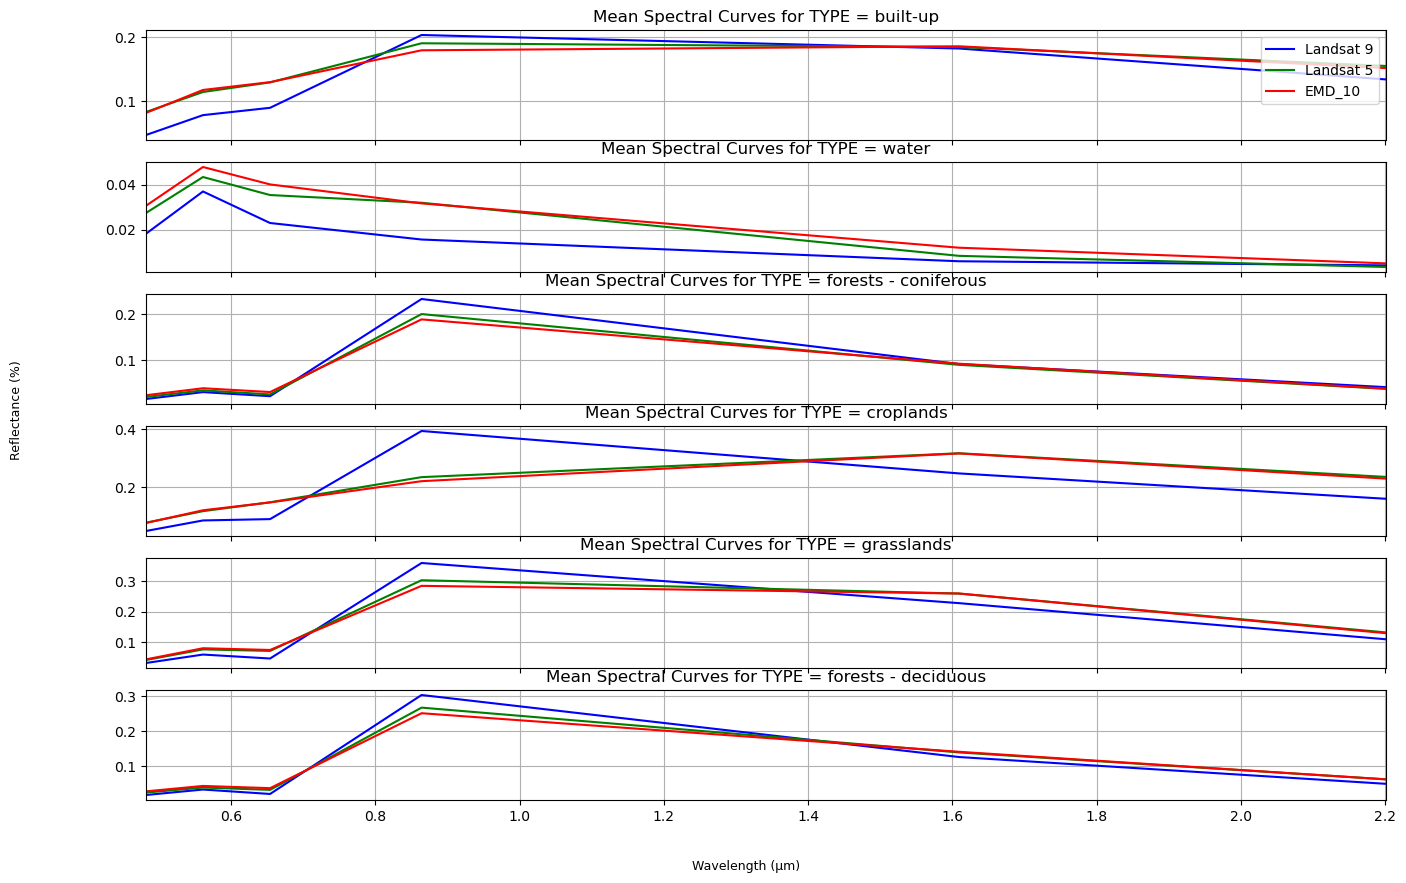

In [ ]:
# list of categories for plotting
type_categories = [1, 2, 3, 4, 5, 6] # , 4, 5, 6
type_name = ['built-up', 'water', 'forests - coniferous', 'croplands', 'grasslands',  'forests - deciduous']
wavelength = np.array([0.482, 0.561, 0.654, 0.864, 1.609, 2.201]) # Wavelengths for Landsat bands: Blue, Green, Red, NIR, SWIR1, SWIR2
gdf_vectors = [gdf_vec_imad[gdf_vec_imad['type'] == t] for t in type_categories] 

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(16, 10), sharex=True) # 

# for each type category plot mean spectral curves
for ax, gdf, type_value in zip(axes, gdf_vectors, type_categories):
    # get mean values for each type
    l9mean, l5mean, imadmean = get_mean_values(gdf)
    
    # plot mean spectral curves
    ax.plot(wavelength, l9mean,  linestyle='-', color='blue', label='Landsat 9') # marker='o',
    ax.plot(wavelength, l5mean,  linestyle='-', color='green', label='Landsat 5') # marker='s',
    ax.plot(wavelength, imadmean,  linestyle='-', color='red', label='EMD_10') # marker='d',
    
    # titles
    ax.set_title(f'Mean Spectral Curves for TYPE = {type_name[type_value-1]}', fontsize=12)
    ax.grid(True)
    ax.set_xlim(wavelength[0], wavelength[-1])  # 0.482 – 2.201
    ax.margins(x=0)    

fig.text(0.5, 0.04, 'Wavelength (µm)', ha='center', fontsize=9)
fig.text(0.04, 0.5, 'Reflectance (%)', va='center', rotation='vertical', fontsize=9)
axes[0].legend(loc='upper right')
#plt.tight_layout()
plt.show()


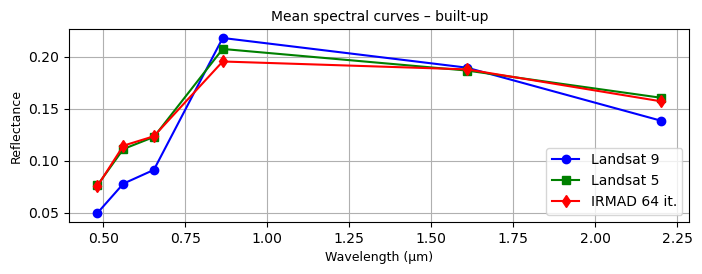

In [ ]:
# GRAPHS OF MEAN/MEDIAN SPECTRAL CURVES
wavelength = np.array([0.482, 0.561, 0.654, 0.864, 1.609, 2.201])
plt.figure(figsize=(8, 2.5))

# mean spectral curves
# plt.plot(wavelength, l9mean_vector1, marker='o', linestyle='-', color='blue', label="Landsat 9")
# plt.plot(wavelength, l5mean_vector1, marker='s', linestyle='-', color='green', label="Landsat 5")
# plt.plot(wavelength, imadmean_vector1, marker='d', linestyle='-', color='red', label="IRMAD")

plt.plot(wavelength, l9median_vector1, marker='o', linestyle='-', color='blue', label='Landsat 9')
plt.plot(wavelength, l5median_vector1, marker='s', linestyle='-', color='green', label='Landsat 5')
plt.plot(wavelength, imadmedian_vector1, marker='d', linestyle='-', color='red', label='IRMAD 64 it.')

# titles
plt.xlabel('Wavelength (µm)', fontsize=9)
plt.ylabel('Reflectance', fontsize=9)
#plt.xlim(wavelength[0], wavelength[-1]) 
#plt.title('Mean Spectral Curves built-up, water, forests - coniferous, croplands, grasslands, forests - deciduous', fontsize=10))
plt.title('Mean spectral curves – built-up', fontsize=10)
plt.legend()
plt.grid(True)

plt.show()